# PAYMENT DELAY CLASSIFICATION PROBLEM

The main goal of this exercise is to implement a system that predicts if a client will register payment delay or not. First, I will explore the provided data by doing an Exploratory Data Analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, precision_recall_fscore_support
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import time
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [2]:
df = pd.read_csv('train.csv')
df.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay
0,HI,33,area_code_415,no,no,0,200.5,117,34.09,159.9,111,13.59,196.2,84,8.83,16.3,6,4.40,3,no
1,TN,80,area_code_415,yes,no,0,276.5,122,47.01,195.6,79,16.63,210.3,78,9.46,7.2,3,1.94,1,yes
2,CT,37,area_code_408,no,no,0,134.9,98,22.93,248.4,130,21.11,236.2,113,10.63,14.7,2,3.97,3,no
3,TN,106,area_code_415,no,no,0,119.2,142,20.26,228.4,139,19.41,197.9,61,8.91,8.4,9,2.27,2,no
4,TX,123,area_code_408,no,no,0,260.9,85,44.35,168.5,103,14.32,178.3,91,8.02,13.3,5,3.59,3,no
5,CT,152,area_code_408,no,yes,20,239.1,105,40.65,209.1,111,17.77,268.2,130,12.07,13.3,3,3.59,5,no
6,NY,87,area_code_415,no,no,0,204.8,101,34.82,161.0,80,13.69,285.7,89,12.86,9.5,3,2.57,0,no
7,UT,110,area_code_415,no,no,0,271.1,108,46.09,237.0,122,20.15,239.9,122,10.80,9.8,5,2.65,2,yes
8,IL,66,area_code_415,no,yes,21,134.4,110,22.85,136.2,104,11.58,215.6,105,9.70,9.7,4,2.62,3,no
9,MI,119,area_code_510,yes,yes,22,172.1,119,29.26,223.6,133,19.01,150.0,94,6.75,13.9,20,3.75,1,yes


In [3]:
#Creating labels 

labels = df['payment_delay']
labels = labels.replace(('yes', 'no'), (1,0))
labels = np.array(labels)

# EDA

I'll start by analysing the dataset, in order to find issues, patterns and dependencies between the features. 

In [4]:
# no. of training examples and number of features

print(df.shape)

(3000, 20)


In [5]:
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
payment_delay                    0
dtype: int64

In [6]:
# Checking for NaN values so I eliminate them.

df.isna().sum()
# df.dropna()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
payment_delay                    0
dtype: int64

In [7]:
#Drop any duplicated rows

df = df.drop_duplicates()
print(df.shape)

(3000, 20)


Seems like there were no NaN, null values or duplicate rows. Great, the dataset is clean! </br> </br> 
Since we're interested in predicting the payment delays, we'll split the dataset in **2 parts**: one part contains information about the customers that registered payment delays and the other part containts information about those who didn't. We'll only analise the statistic parameters of each column: **mean** and **standard deviation**, so we can get an idea of the mathematical distribution that features these values.

In [8]:
df_yes = df[df['payment_delay'] == 'yes'].describe(percentiles=[])
print('No. of customers who delayed their payment: ', df[df['payment_delay'] == 'yes'].shape[0])
df_yes = df_yes[1:3]
df_yes

No. of customers who delayed their payment:  413


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
mean,103.765133,4.622276,209.580872,100.104116,35.629201,211.148426,99.687651,17.947579,206.382082,99.581114,9.287264,10.683051,4.285714,2.884964,2.256659
std,38.769615,11.377362,67.943348,20.021501,11.550457,49.828265,19.755711,4.235185,51.128992,19.604124,2.300929,2.859689,2.720065,0.771956,1.849163


In [9]:
df_no = df[df['payment_delay'] == 'no'].describe(percentiles=[])
print('No. of customers who paid on time: ', df[df['payment_delay'] == 'no'].shape[0])
df_no = df_no[1:3]
df_no

No. of customers who paid on time:  2587


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
mean,99.990336,8.512949,175.806997,100.248550,29.887762,198.259644,100.336683,16.852319,200.256320,99.996908,9.011631,10.130421,4.528798,2.735717,1.485504
std,39.581515,13.996993,50.014753,19.726153,8.502478,49.956122,19.764935,4.246245,50.780369,19.683300,2.285141,2.724591,2.449064,0.735540,1.173339


Big problem: **the dataset is imbalanced**. Almost 14% of the dataset is comprised of customers examples that registered payment delays, so almost 6 times more customers paid on time. I'll except the proposed prediction models to better identify the customers who won't register payment delays (and we'll see that it happens so).

In [10]:
data = [go.Bar(x=df_yes.columns, y=df_yes.loc['mean'], name='Columns mean - Payment delay'),
        go.Bar(x=df_yes.columns, y=df_no.loc['mean'], name='Columns mean - Payment on time')]

layout = go.Layout(barmode='group')

fig = dict(data = data, layout = layout)
iplot(fig, show_link=False)

data = [go.Bar(x=df_yes.columns, y=df_yes.loc['std'], name='Columns standard dev - Payment delay'),
        go.Bar(x=df_yes.columns, y=df_no.loc['std'], name='Columns standard dev - Payment on time')]

layout = go.Layout(barmode='group')

fig = dict(data = data, layout = layout)
iplot(fig, show_link=False)

It looks like most of the customers that registered payment delay spend more time on the phone than the other ones, especially during daytime. They also tend to contact the customer service personel more frequently. Regarding these customers, in most cases, the mean and standard deviation of the common columns is higher, which results in higher values. </br> </br>

So, my thought is that the main reason customers register payment delays is because of the time spent on the phone, and consequently this results in higher telephone bills, so maybe these customers don't have the money to pay the bill on time, hence the registered delay.

I'll further analyze the "binary" columns, the one that only contain yes/no values. 

In [11]:
# y.head(20)
fig = px.pie(df[df['payment_delay'] == 'yes'], names='international_plan', title='Payment Delay - International Plan')
fig.show()

fig = px.pie(df[df['payment_delay'] == 'no'], names='international_plan', title='Payment on time - International Plan')
fig.show()


It seems like most of the customers that did not register payment delays didn't have a international plan subscription. However, the majority of those who did not pay on time didn't subscribe to this plan as well, but almost 30% of them had a subscription. So, my guess is that another cause of the payment delays is given by the high price of this international plan.  

In [12]:
# y.head(20)
fig = px.pie(df[df['payment_delay'] == 'yes'], names='voice_mail_plan', title='Payment Delay - Voice Mail Plan')
fig.show()

fig = px.pie(df[df['payment_delay'] == 'no'], names='voice_mail_plan', title='Payment on time - Voice Mail Plan')
fig.show()


In [13]:
fig = px.pie(df[df['payment_delay'] == 'yes'], names='state', title='Payment Delay - State')
fig.show()

fig = px.pie(df[df['payment_delay'] == 'no'], names='state', title='Payment on time - State')
fig.show()

Seems like there are no outliers in the state distribution of the customers.

In [14]:
fig = px.pie(df[df['payment_delay'] == 'yes'], names='area_code', title='Payment Delay - Area code')
fig.show()

fig = px.pie(df[df['payment_delay'] == 'no'], names='area_code', title='Payment on time - Area code')
fig.show()

Little difference in the area code distribution too.

Finally, the correlation heatmap will find dependencies between variables. Let's see if my assumptions were correct.

<AxesSubplot:>

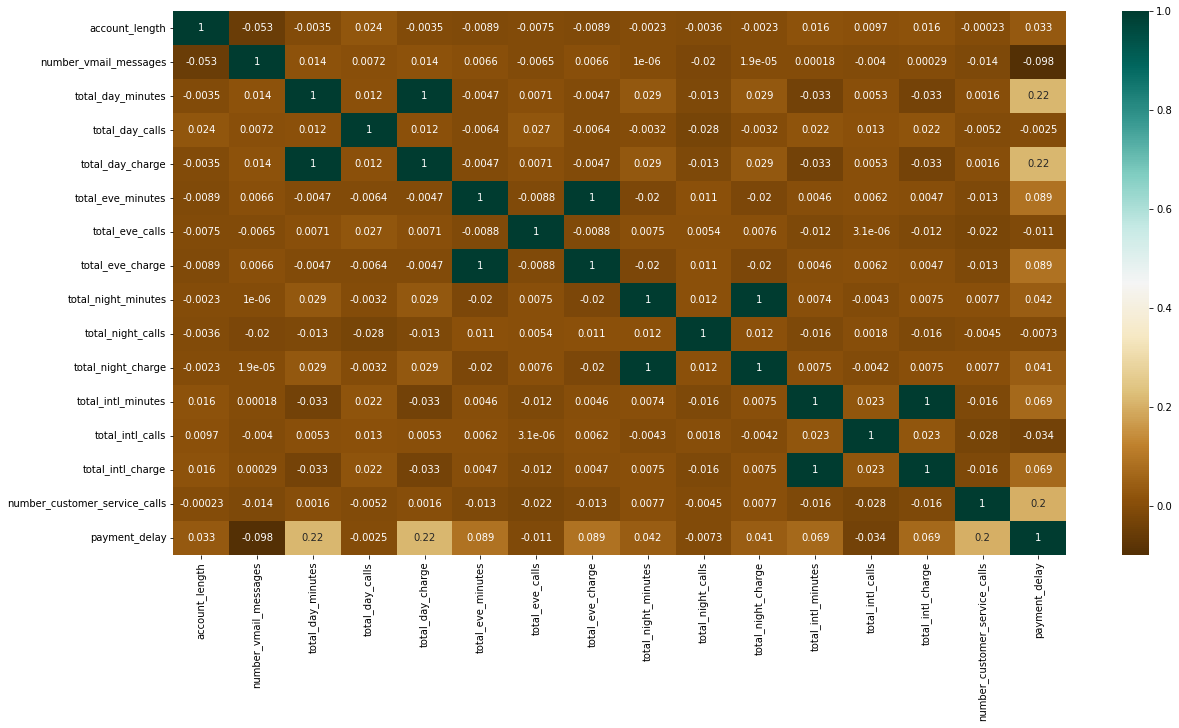

In [15]:
# Heatmap - finding the correlation of the variables
df_1 = df.copy()
df_1['payment_delay'] = df_1['payment_delay'].replace(('yes', 'no'), (1,0))
plt.figure(figsize=(20,10))
c = df_1.corr()
sns.heatmap(c, cmap='BrBG', annot=True)

Looks like the payment delay is mostly influenced by the number of customer service calls and time spent on the phone during daytime by the customers.

# PREDICTION MODEL - DECISION TREE

The most simple model for this classification task is a **decision tree**. Despite its simplicity, it is prone to overfit. 

In [16]:
# df_features = df.drop(['payment_delay', 'state', 'area_code', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls','number_vmail_messages'], axis = 1)
df_features = df.drop(['payment_delay'], axis = 1)

In [17]:
df_one_hot = pd.get_dummies(df_features)
print(df_one_hot.shape)

(3000, 73)


In [18]:
df_one_hot.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,33,0,200.5,117,34.09,159.9,111,13.59,196.2,84,...,0,0,0,0,1,0,1,0,1,0
1,80,0,276.5,122,47.01,195.6,79,16.63,210.3,78,...,0,0,0,0,1,0,0,1,1,0
2,37,0,134.9,98,22.93,248.4,130,21.11,236.2,113,...,0,0,0,1,0,0,1,0,1,0
3,106,0,119.2,142,20.26,228.4,139,19.41,197.9,61,...,0,0,0,0,1,0,1,0,1,0
4,123,0,260.9,85,44.35,168.5,103,14.32,178.3,91,...,0,0,0,1,0,0,1,0,1,0


In [19]:
def standard_scale(dataframe):
    for i in df_yes.columns:
        dataframe[i] = (dataframe[i] - dataframe[i].mean())/dataframe[i].std()
    return dataframe

In [20]:
# df_one_hot_ss = standard_scale(df_one_hot)
# df_one_hot.head()

In [21]:
dataset = df_one_hot.to_numpy()

First, I will split the training dataset into a new training set and a test set. Thus, I will check the model performance on a test data with known labels, in order to determine its prediction accuracy.

In [22]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(dataset, labels, test_size = 0.33, random_state = 42)


In [23]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2010, 73)
Training Labels Shape: (2010,)
Testing Features Shape: (990, 73)
Testing Labels Shape: (990,)


Training - time taken: 0.1
Accuracy: 89.8


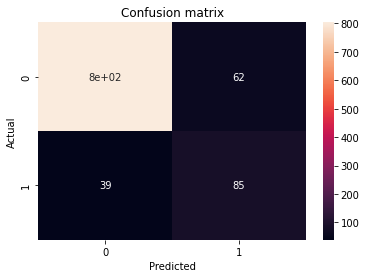

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
tic = time.time()
clf = clf.fit(train_features, train_labels)
tac = time.time()
print("Training - time taken:", np.round(tac-tic, 2))
#Predict the response for test dataset
y_pred = clf.predict(test_features)

print("Accuracy:", np.round(accuracy_score(test_labels, y_pred)*100, 2))

data = {'y_Actual':    test_labels,
        'y_Predicted': y_pred
        }

dataf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dataf['y_Actual'], dataf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()

Not that bad for a simple model, seems like it correctly classifies 68% ($\frac{85}{85+39}$ $\times$ 100) of the minority class examples and around 93% ($\frac{814}{814+62}$ $\times$ 100) of the majority class. But we can do better. 

# PREDICTION MODEL - RANDOM FOREST

In order to imporve the performance of the wanted prediction model, I'll use the **random forest machine learning method**. For preprocessing the data, we need to encode the string data using the **one hot encoding technique** in order to allow the machine learning model to process it. 

In [25]:
def train_model_rf(N, train_features, train_labels):
    model = RandomForestRegressor(n_estimators = N, random_state = 42)
    
    # Train the model on training data
    tic = time.time()
    model.fit(train_features, train_labels);
    tac = time.time()
    print('Training - time taken: ', np.round(tac-tic, 3),' seconds.')
    return model

def test_model(model, test_features):
    predictions = model.predict(test_features)
    predictions = np.where(predictions > 0.5, 1, 0)
    # print((predictions==test_labels).sum())
    accuracy = np.round((predictions==test_labels).sum()/len(test_labels)*100, 2)
    return accuracy

The model predicts labels with values in [0,1]. However, I'll consider that any value below 0.5 is considered 0 (no), and the rest of them are considered 1 (yes).

I will now train the model varying the number of trees in the random forest and I will compare its performance.

In [26]:
N = [10,50,100,200,500,1000]
for n in N:
    model = train_model_rf(n, train_features, train_labels)
    accuracy = test_model(model, test_features)
    print('Accuracy for ',n,' decision trees: ',accuracy,'% \n')
    

Training - time taken:  0.584  seconds.
Accuracy for  10  decision trees:  94.04 % 

Training - time taken:  2.963  seconds.
Accuracy for  50  decision trees:  93.94 % 

Training - time taken:  5.766  seconds.
Accuracy for  100  decision trees:  94.04 % 

Training - time taken:  11.815  seconds.
Accuracy for  200  decision trees:  93.94 % 

Training - time taken:  29.09  seconds.
Accuracy for  500  decision trees:  94.04 % 

Training - time taken:  58.348  seconds.
Accuracy for  1000  decision trees:  94.14 % 



Looks like the accuracy doesn't increase considerably as I increase the number of trees, thus, I will decide on the model that has 200 trees.

Training - time taken:  5.978  seconds.


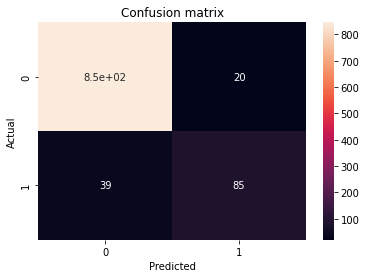

In [27]:
model = train_model_rf(100, train_features, train_labels)
data = {'y_Actual':    test_labels,
        'y_Predicted': np.where(model.predict(test_features) > 0.5, 1, 0)
        }

dataf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dataf['y_Actual'], dataf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()

The model only identifies 68% ($\frac{85}{85+39}$ $\times$ 100) of the customers who actually registered payment delays. Given the confusion matrix, we can now calculate other valuables performance parameters, such as **recall**, **precision** and **F1 score**.

In [28]:
def performance_parameters(test_labels, model):
    [pr, rec, f1, support] = precision_recall_fscore_support(test_labels, np.where(model.predict(test_features)>0.5,1,0), average='binary')
    print('Precision =', np.round(pr, 2))
    print('Recall=', np.round(rec, 2))
    print('F1 score=',np.round(f1, 2))

performance_parameters(test_labels, model)

Precision = 0.81
Recall= 0.69
F1 score= 0.74


**I will now train the model using the whole provided training set.**

In [29]:
test = pd.read_csv('test.csv')
# test_modif = test.drop(['state', 'area_code', 'total_day_calls', 'total_eve_calls', 'total_night_calls', 'total_intl_calls','number_vmail_messages'], axis = 1)
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
1,AK,104,area_code_408,no,no,0,278.4,106,47.33,81.0,113,6.89,163.2,137,7.34,9.8,5,2.65,1
2,AK,126,area_code_415,no,no,0,58.2,94,9.89,138.7,118,11.79,136.8,91,6.16,11.9,1,3.21,5
3,AK,130,area_code_415,no,no,0,242.5,101,41.23,102.8,114,8.74,142.4,89,6.41,9.3,2,2.51,2
4,AK,78,area_code_510,no,no,0,190.3,88,32.35,194.5,89,16.53,256.5,109,11.54,11.7,5,3.16,2


In [30]:
# test = test.drop('state', axis = 1)
test_one_hot = pd.get_dummies(test)
# test_one_hot = standard_scale(test_one_hot)
new_test_features = test_one_hot.to_numpy()
print(new_test_features.shape)

(2000, 73)


In [31]:
model = train_model_rf(200, dataset, labels)
predictions = model.predict(new_test_features)

Training - time taken:  19.504  seconds.


In [32]:
a = np.sort(predictions)[::-1]

In [33]:
print((a[:300]>0.5).sum())

238


Considering the 0.5 threshold, looks like only 238 customers out of 2000 will delay their payment. However, since the task is to export the first 300 customers who are likely to register such delays, I'll just concatenate the predictions array to the initial test dataset and sort the values accordingly.

In [34]:
def create_output(dataframe, predictions_vector):
    output_df = dataframe.copy()
    output_df.insert(test.shape[1], 'payment_delay_prob[%]', np.round(predictions_vector*100, 2))
    output_df.insert(test.shape[1], 'payment_delay', np.where(predictions_vector>0.5,1,0))
    output_df['payment_delay'] = output_df['payment_delay'].replace((1,0),('yes','no'))
    output_df = output_df.sort_values('payment_delay_prob[%]', ascending = False)
    return output_df

rf_output = create_output(test, predictions)
rf_output.head(300)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay,payment_delay_prob[%]
1014,MT,64,area_code_415,no,no,0,131.3,105,22.32,109.4,...,9.30,246.2,125,11.08,12.7,4,3.43,4,yes,100.0
708,MA,119,area_code_408,yes,yes,16,147.2,103,25.02,160.1,...,13.61,184.0,120,8.28,7.7,2,2.08,0,yes,100.0
1075,ND,147,area_code_408,yes,yes,35,157.5,109,26.78,189.6,...,16.12,227.0,76,10.22,11.1,2,3.00,3,yes,100.0
72,AL,91,area_code_415,no,no,0,271.9,106,46.22,231.9,...,19.71,247.0,110,11.12,9.3,3,2.51,1,yes,100.0
1835,WA,100,area_code_408,no,no,0,70.8,94,12.04,215.6,...,18.33,230.8,125,10.39,9.5,1,2.57,6,yes,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,SC,84,area_code_415,no,no,0,274.1,119,46.60,144.1,...,12.25,268.2,100,12.07,9.9,5,2.67,2,no,27.5
772,MD,156,area_code_510,no,no,0,81.7,133,13.89,242.5,...,20.61,203.8,112,9.17,12.3,6,3.32,3,no,27.5
1681,TX,138,area_code_415,no,no,0,217.2,73,36.92,190.8,...,16.22,133.5,97,6.01,5.2,3,1.40,4,no,27.0
667,LA,149,area_code_415,no,yes,20,198.9,77,33.81,274.0,...,23.29,190.7,76,8.58,14.3,9,3.86,1,no,27.0


# PREDICTION MODEL - GRADIENT BOOSTING 

I will repeat the same steps as before in order to find the best model to predict the payment delays using the gradient boosting algorithm.

In [35]:
def train_model_gb(N, lr, md, train_features, train_labels):
    model = GradientBoostingClassifier(n_estimators = N, learning_rate = lr, max_depth = md)
    
    # Train the model on training data
    tic = time.time()
    model.fit(train_features, train_labels);
    tac = time.time()
    print('Training - time taken: ', np.round(tac-tic, 3),' seconds.')
    return model

In [36]:
N = [10,50,100,200,500,1000]
for n_trees in N:
    model = train_model_gb(n_trees, 0.1, 3, train_features, train_labels)
    print('Accuracy for', n_trees, 'decision trees:', np.round(model.score(test_features, test_labels)*100,2),'% \n')

Training - time taken:  0.237  seconds.
Accuracy for 10 decision trees: 92.22 % 

Training - time taken:  1.162  seconds.
Accuracy for 50 decision trees: 94.55 % 

Training - time taken:  2.364  seconds.
Accuracy for 100 decision trees: 94.34 % 

Training - time taken:  5.037  seconds.
Accuracy for 200 decision trees: 94.04 % 

Training - time taken:  11.838  seconds.
Accuracy for 500 decision trees: 94.65 % 

Training - time taken:  24.395  seconds.
Accuracy for 1000 decision trees: 94.44 % 



Since the performance is similar for n_trees > 50, I'll choose the n_trees = 100 for a shorter training time.

In [37]:
N = [0.0001, 0.001, 0.01, 0.1, 1]
for lr in N:
    model = train_model_gb(100, lr, 3, train_features, train_labels)
    print('Accuracy for learning rate =',lr,':',np.round(model.score(test_features, test_labels)*100,2),'% \n')

Training - time taken:  2.585  seconds.
Accuracy for learning rate = 0.0001 : 87.47 % 

Training - time taken:  2.645  seconds.
Accuracy for learning rate = 0.001 : 87.47 % 

Training - time taken:  2.44  seconds.
Accuracy for learning rate = 0.01 : 92.22 % 

Training - time taken:  2.442  seconds.
Accuracy for learning rate = 0.1 : 94.55 % 

Training - time taken:  2.439  seconds.
Accuracy for learning rate = 1 : 92.02 % 



Turns out that the best value for the learning rate is 0,1. Finally, I'll set the maximum depth of a tree for a better perfromance.

In [38]:
N = [3,4,5,6,7,8]
for md in N:
    model = train_model_gb(100, 0.1, md, train_features, train_labels)
    print('Accuracy for tree depth =',md,':',np.round(model.score(test_features, test_labels)*100,2),'% \n')

Training - time taken:  2.453  seconds.
Accuracy for tree depth = 3 : 94.34 % 

Training - time taken:  3.448  seconds.
Accuracy for tree depth = 4 : 94.34 % 

Training - time taken:  4.393  seconds.
Accuracy for tree depth = 5 : 94.65 % 

Training - time taken:  5.19  seconds.
Accuracy for tree depth = 6 : 93.84 % 

Training - time taken:  6.022  seconds.
Accuracy for tree depth = 7 : 93.94 % 

Training - time taken:  7.102  seconds.
Accuracy for tree depth = 8 : 94.04 % 



Training - time taken:  4.348  seconds.


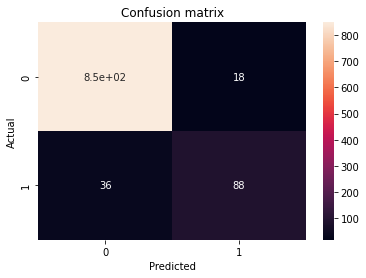

In [39]:
model = train_model_gb(100, 0.1, 5, train_features, train_labels)
data = {'y_Actual':    test_labels,
        'y_Predicted': model.predict(test_features)
        }

dataf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dataf['y_Actual'], dataf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()

**The model is able to identify approx. 71% of the 124 customers that registered payment delays** (still better than 68%) and **98% of the customers who didn't register payment delays**. This may be caused mainly by the (much) higher number of examples where the customers paid on time. In the next session, I will propose a method to fix the imabalnce in the training dataset.

In [40]:
performance_parameters(test_labels, model)

Precision = 0.83
Recall= 0.71
F1 score= 0.77


So, the final parameters are: **n_trees = 100**, **learning_rate = 0.1**, **max_depth=5**. I will now train a new model using the whole provided training dataset.

In [41]:
model_gb = train_model_gb(100, 0.1, 5, dataset, labels)
predictions_gb = model_gb.predict_proba(new_test_features)
mean_squared_error(predictions, predictions_gb[:,1])

Training - time taken:  5.673  seconds.


0.0061876416519153835

In [42]:
a = np.where(predictions>0.5, 1, 0)
b = np.where(predictions_gb[:,1]>0.5, 1, 0)
# mean_squared_error(a, predictions_gb)
print('Predicted delays - random forest model:',(a>0.5).sum()) 
print('Predicted delays - gradient boosting model:',(b>0.5).sum())
print('Percentage of identically predicted values: ',(a==b).sum()/2000*100,'%')

Predicted delays - random forest model: 238
Predicted delays - gradient boosting model: 252
Percentage of identically predicted values:  98.2 %


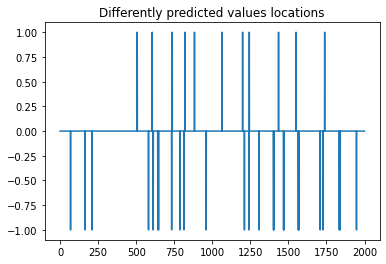

In [43]:
#Differently predicted values

plt.plot(a-b)
plt.title('Differently predicted values locations')

plt.show()

Even though there is little difference between the accuracies of the 2 models, they behave differently in the context of predicting the test labels. 

In [44]:
gb_output = create_output(test, predictions_gb[:,1])
gb_output.head(300)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay,payment_delay_prob[%]
1549,SC,116,area_code_408,no,no,0,288.0,120,48.96,255.8,...,21.74,233.4,99,10.50,13.4,4,3.62,0,yes,100.00
786,ME,92,area_code_415,yes,no,0,130.7,113,22.22,260.6,...,22.15,244.2,98,10.99,9.4,2,2.54,2,yes,99.92
1308,NY,126,area_code_415,yes,no,0,239.7,87,40.75,281.7,...,23.94,183.5,113,8.26,11.4,1,3.08,1,yes,99.89
1721,UT,133,area_code_510,no,no,0,338.4,86,57.53,234.6,...,19.94,264.8,139,11.92,14.8,4,4.00,3,yes,99.84
46,AL,197,area_code_415,yes,no,0,127.3,80,21.64,222.3,...,18.90,173.9,95,7.83,13.7,5,3.70,5,yes,99.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,TX,125,area_code_415,no,no,0,190.2,107,32.33,209.2,...,17.78,102.1,136,4.59,14.2,5,3.83,4,no,23.50
153,CA,120,area_code_415,no,no,0,252.1,110,42.86,226.1,...,19.22,155.6,83,7.00,13.8,3,3.73,1,no,23.17
721,MA,158,area_code_415,no,no,0,214.7,112,36.50,262.9,...,22.35,228.9,68,10.30,11.6,2,3.13,1,no,21.25
1185,NJ,53,area_code_408,no,no,0,228.6,117,38.86,132.8,...,11.29,227.2,124,10.22,10.1,2,2.73,9,no,20.44


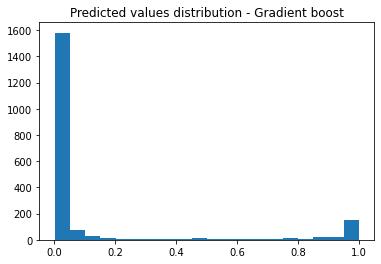

In [45]:
plt.hist(predictions_gb[:,1], 20)
plt.title('Predicted values distribution - Gradient boost')
plt.show()

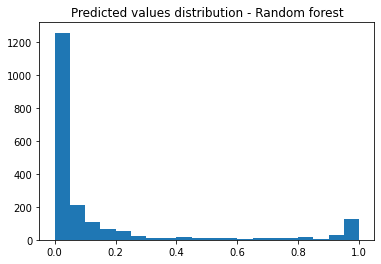

In [46]:
plt.hist(predictions, 20)
plt.title('Predicted values distribution - Random forest')
plt.show()

As we can observe, the gradient boosting model tends to classify the predicted probabilities closer to 0% or 100% than the random forest model. The final prediction of the random forest model is determined based on the outputs of each tree, which are independent variables, whereas the final prediction of the gradient boost model is determined based on the minimisation of a cost function with respect to the output of each tree, so this model tends to be more accurate. </br> </br> 

However, if we consider the 0.5 threshold for labeling the predicted values (yes/no), **both models predict the values almost identicaly, with an error of 2%**. 

# PREDICTION MODEL - NEURAL NETWORK

My final proposed prediction model consists in a convolutional neural network.

In [47]:
# import tensorflow as tf
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


# # Early stopping prevents overfitting the model
# def get_callbacks():
#     early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience= 20, mode='min'
#                                                       , restore_best_weights=True)
#     return early_stopping

# df_one_hot_ss = standard_scale(df_one_hot)
# dataset_ss = df_one_hot.to_numpy()
# train_features, test_features, train_labels, test_labels = train_test_split(dataset_ss, labels, test_size = 0.33, 
#                                                                             random_state = 42)

# model_nn = Sequential()
# model_nn.add(Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(73,)))
# model_nn.add(BatchNormalization())
# model_nn.add(Dropout(0.2))
# model_nn.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
# model_nn.add(Dropout(0.2))
# model_nn.add(Dense(1, activation='sigmoid'))
# # compile the model
# model_nn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
# # fit the model
# history = model_nn.fit(train_features, train_labels, epochs=200, batch_size=32, verbose=0, callbacks=get_callbacks(),
#                        validation_data = (test_features, test_labels))
# # evaluate the model
# loss, acc = model_nn.evaluate(test_features, test_labels, verbose=0)
# print('Test Accuracy: %.3f' % np.round(acc*100, 2))

In [48]:
def plot_metrics(history):
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


# Early stopping prevents overfitting the model
def get_callbacks():
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience= 20, mode='min'
                                                      , restore_best_weights=True)
    return early_stopping

df_one_hot_ss = standard_scale(df_one_hot)
dataset_ss = df_one_hot.to_numpy()
train_features, test_features, train_labels, test_labels = train_test_split(dataset_ss, labels, test_size = 0.33, 
                                                                            random_state = 42)

train_features_3D = train_features[:,:,np.newaxis]
test_features_3D = test_features[:,:,np.newaxis]

model_nn = Sequential()
model_nn.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(73,1)))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.3))

model_nn.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dropout(0.3))

model_nn.add(tf.keras.layers.Flatten())
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00005), loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
tic = time.time()
history = model_nn.fit(train_features_3D, train_labels, epochs=100, batch_size=32, verbose=0, callbacks=get_callbacks(),
                         validation_data = (test_features_3D, test_labels))
tac = time.time()
print("Training - time taken (seconds):",np.round(tac-tic, 2))
# evaluate the model
loss, acc = model_nn.evaluate(test_features_3D, test_labels, verbose=0)
print('Test Accuracy: %.3f' % np.round(acc*100, 2))

Training - time taken (seconds): 169.6
Test Accuracy: 92.320


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


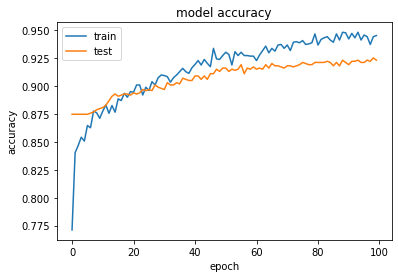

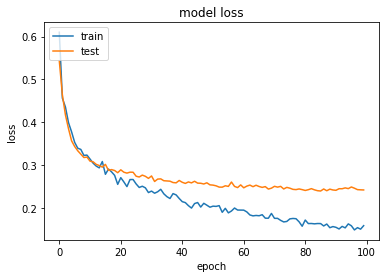

In [51]:
plot_metrics(history)

Accuracy and loss training curves seem pretty good. However...

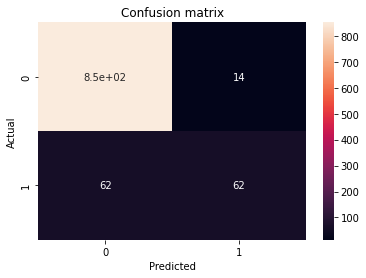

In [52]:
cnn_predict = np.where(model_nn.predict(test_features_3D) > 0.5, 1, 0)
loss, acc = model_nn.evaluate(test_features_3D, test_labels, verbose=0)
data = {'y_Actual':    test_labels,
        'y_Predicted': cnn_predict.reshape(990,)
        }

dataf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dataf['y_Actual'], dataf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()

The network wrongly predicts around 50% of the customers who registered payment delays, so the imbalanced dataset problem has a more pronounced impact on the neural networks. That's beacuse the network learns its parameters using all the features of the training set, and since the majority consists in 0 - labeled examples, the model will better classify the 0-labeled test examples. Moreover, for such a simple dataset, a neural network is too much, since it takes a lot of time to train and generally it is used for more complex problems.

# FINAL RESULTS

Finally, I will export .csv file containing the indices of the first 300 customers that are likely to register payment delay. I will extract these indices from the gradient boosting model output dataframe. First, I'll analyse the payment delay dependency on the other values.

<AxesSubplot:>

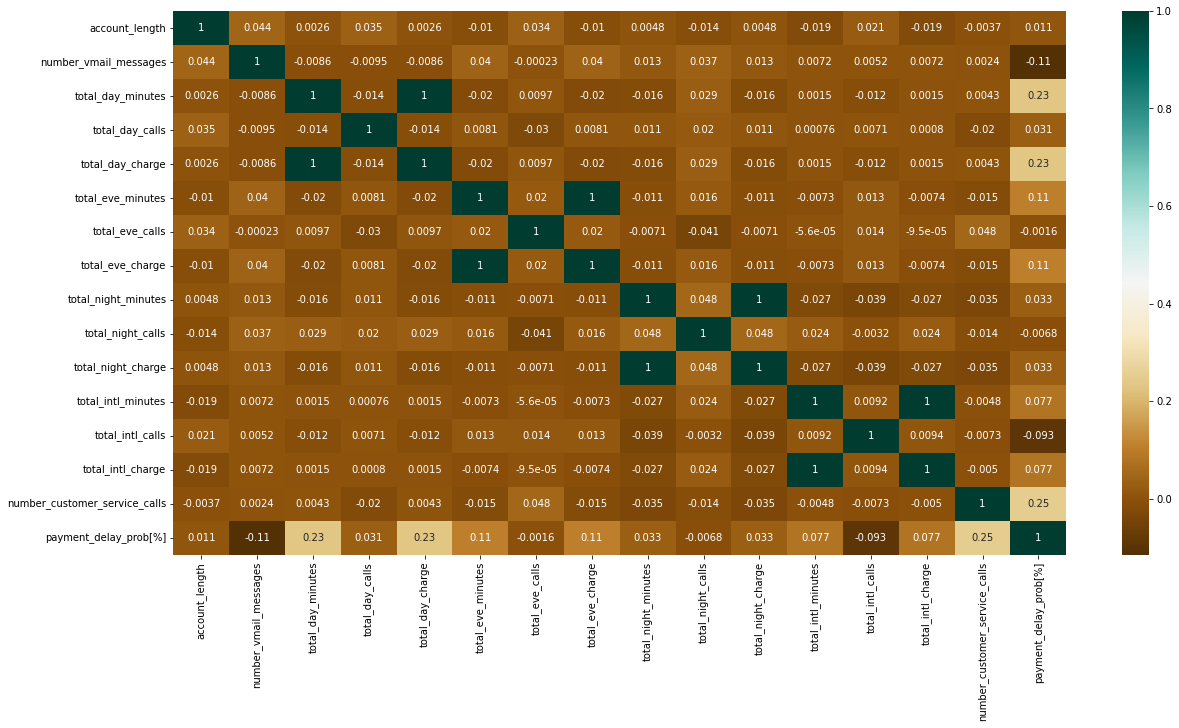

In [53]:
# Heatmap - finding the correlation of the variables

plt.figure(figsize=(20,10))
c = gb_output.corr()
sns.heatmap(c, cmap='BrBG', annot=True)

Great! Looks like the model correctly learned from the training features, since the output dataset's variables tend to follow the same pattern as the training dataset's ones.

In [54]:
final_df = gb_output.head(300)

In [55]:
final_df.to_csv('predicted_payment_delay.csv')

I managed to train different models that try to predict the correct number of customers who will most likely register payment delays in a given database. The best performance is achieved with a classical machine learning model: the decision tree. Random forest and gradient boosted decision-trees are generally considered among the best classifiers used in artificial intelligence.
</br> </br> 

The biggest problem still lies in the imbalanced dataset. There are several methods that may fix this problem: oversampling the minority class, undersampling the majority class or both, depending on the task to be carried out. I will propose several methods.

# IMPROVEMENT - BALANCING THE DATASET

(or at least I tried to...)

I'll try to balance the dataset by upsampling the minority class examples. First, I will use the SMOTE method (refer to https://arxiv.org/pdf/1106.1813.pdf) to create new examples which feature customers that registered payment delay.

In [56]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape %s' % Counter(train_labels))

sm = SMOTE(random_state=42)
train_features_res, train_labels_res = sm.fit_resample(train_features, train_labels)
print('Resampled dataset shape %s' % Counter(train_labels_res))

Original dataset shape Counter({0: 1721, 1: 289})
Resampled dataset shape Counter({0: 1721, 1: 1721})


Training - time taken:  6.075  seconds.


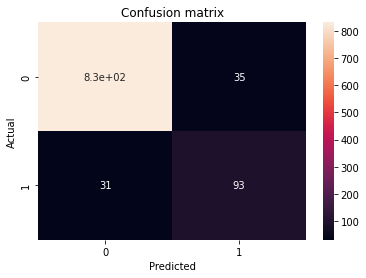

Accuracy: 93.33 %
Precision = 0.73
Recall= 0.75
F1 score= 0.74


In [57]:
model = train_model_gb(100, 0.1, 5, train_features_res, train_labels_res)
data = {'y_Actual':    test_labels,
        'y_Predicted': np.where(model.predict(test_features) > 0.5, 1, 0)
        }

dataf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dataf['y_Actual'], dataf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()

print('Accuracy:',np.round(model.score(test_features, test_labels)*100,2),'%')
performance_parameters(test_labels, model)

The model manages to correctly classify 75% of the payment delays, with roughly 96% accuracy in the on-time payment cases. </br> 

Generally (but not always), an upsampling method should be combined with a downsampling method for better performance. I will use the SMOTEENN method (refer to https://www.researchgate.net/publication/220520041_A_Study_of_the_Behavior_of_Several_Methods_for_Balancing_machine_Learning_Training_Data). 

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(0.7)
under = RandomUnderSampler(0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
train_features_res, train_labels_res = pipeline.fit_resample(train_features, train_labels)
print('Resampled dataset shape %s' % Counter(train_labels_res))

Resampled dataset shape Counter({0: 1505, 1: 1204})


C:\Users\Administrator\.conda\envs\tf-gpu\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning:

Pass sampling_strategy=0.7 as keyword args. From version 0.9 passing these as positional arguments will result in an error

C:\Users\Administrator\.conda\envs\tf-gpu\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning:

Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error



Training - time taken:  4.625  seconds.


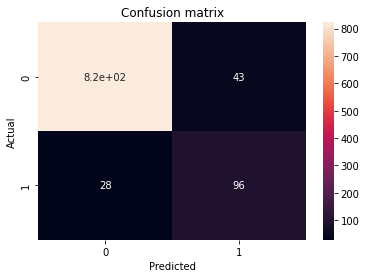

Accuracy: 92.83 %
Precision = 0.69
Recall= 0.77
F1 score= 0.73


In [59]:
model = train_model_gb(100, 0.1, 5, train_features_res, train_labels_res)
data = {'y_Actual':    test_labels,
        'y_Predicted': np.where(model.predict(test_features) > 0.5,1,0)
        }

dataf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dataf['y_Actual'], dataf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()

print('Accuracy:',np.round(model.score(test_features, test_labels)*100,2),'%')
performance_parameters(test_labels, model)

In [60]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=42)
train_features_res, train_labels_res = sme.fit_resample(train_features, train_labels)
print('Resampled dataset shape %s' % Counter(train_labels_res))

Resampled dataset shape Counter({1: 1702, 0: 1167})


Training - time taken:  5.291  seconds.


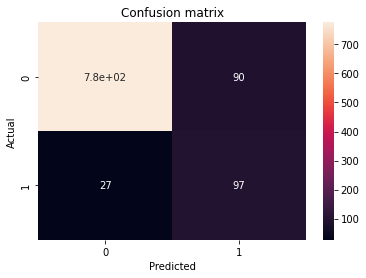

Accuracy: 88.18 %
Precision = 0.52
Recall= 0.78
F1 score= 0.62


In [61]:
model = train_model_gb(100, 0.1, 5, train_features_res, train_labels_res)
data = {'y_Actual':    test_labels,
        'y_Predicted': np.where(model.predict(test_features) > 0.5,1,0)
        }

dataf = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(dataf['y_Actual'], dataf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.title('Confusion matrix')
plt.show()

print('Accuracy:',np.round(model.score(test_features, test_labels)*100,2),'%')
performance_parameters(test_labels, model)

Even though there's a slight increase in the true positive predictions, the false positive correct predictions tend to decrease. Thus, it is necessary to find a trade-off between the precision and recall. Our model should correctly classify as many 1-labeled examples. In the same time, the false positive rate will get higher, and for much larger and even more imbalanced datasets, this will lead to many errors. 

In [62]:
dataset_res, labels_res = pipeline.fit_resample(dataset, labels)
print('Resampled dataset shape %s' % Counter(labels_res))

Resampled dataset shape Counter({0: 2262, 1: 1810})


In [63]:
model_gb2 = train_model_gb(100, 0.1, 5, dataset_res, labels_res)
predictions_gb2 = model_gb2.predict(new_test_features)
print('Predicted delays - gradient boosting model:',predictions_gb2.sum())

Training - time taken:  7.012  seconds.
Predicted delays - gradient boosting model: 270


In [64]:
gb_output = create_output(test, model_gb2.predict_proba(new_test_features)[:,1])
gb_output.head(300)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,payment_delay,payment_delay_prob[%]
1549,SC,116,area_code_408,no,no,0,288.0,120,48.96,255.8,...,21.74,233.4,99,10.50,13.4,4,3.62,0,yes,99.90
149,CA,138,area_code_510,yes,no,0,196.2,129,33.35,176.5,...,15.00,232.4,108,10.46,15.2,1,4.10,0,yes,99.75
1184,NJ,60,area_code_408,no,no,0,289.8,101,49.27,255.6,...,21.73,242.8,76,10.93,11.7,4,3.16,2,yes,99.61
883,MN,125,area_code_415,yes,yes,29,260.8,81,44.34,163.7,...,13.91,271.7,117,12.23,17.0,6,4.59,1,yes,99.55
1245,NM,137,area_code_408,yes,no,0,312.4,110,53.11,231.1,...,19.64,120.1,78,5.40,10.6,2,2.86,1,yes,99.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,TX,128,area_code_415,no,yes,43,177.8,100,30.23,147.3,...,12.52,194.2,92,8.74,11.9,1,3.21,0,no,36.88
1679,TX,125,area_code_415,no,no,0,190.2,107,32.33,209.2,...,17.78,102.1,136,4.59,14.2,5,3.83,4,no,35.84
806,ME,25,area_code_510,no,no,0,242.6,69,41.24,209.0,...,17.77,219.7,82,9.89,14.4,6,3.89,2,no,35.55
1946,WV,3,area_code_408,no,no,0,182.9,87,31.09,172.1,...,14.63,233.1,89,10.49,12.1,3,3.27,4,no,35.22
